In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy as sy
import scipy.stats
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from scipy import ndimage
import PIL.Image
import math
import os
import string

import sys
path=r'C:\Users\31649\Documents\genome analysis\genome_topology\functions'
sys.path.append(path)


from statistical_analysis import correlate
from statistical_analysis import comparison_distributions
from math_tools import lin_fit
from math_tools import line
from plotting_tools import set_layout
from plotting_tools import save_figures
from matrix_analysis import Select_entangled_fraction
from matrix_analysis import length_L_pattern
from matrix_analysis import read_topology_matrix

## Plot the topology matrix
Short notebook for quick visualization of the topology matrix.
- Pick resolution, quantile threshold, segment number, chromosome, sample
of the matrix you want to visualize from your dataset

In [3]:
resolution = '160'
chrom = '1'
sample = 'Treated1'
thresh = 0.99
chosen_segment = 0
n_segments=8
path_matrices = f'results counts/matrices/local matrices/{resolution}/{n_segments} segments'
samples = ['Control1', 'Control2', 'Treated1', 'Treated2']

#Read matrix
matrix = read_topology_matrix(f'{path_matrices}/{chrom}_{sample}_{chosen_segment}.feather')

Plot the matrix: choose the boundaries to visualize a portion of the matrix only (startx, endx, starty, endy)

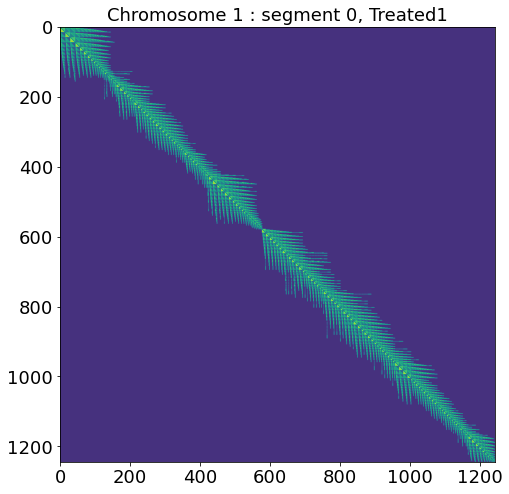

In [13]:
plt.figure(figsize = (10, 8))
set_layout(18, 18, 18)
plt.title(f'Chromosome {chrom} : segment {chosen_segment}, {sample}')
len_matrix = len(matrix)

startx = 0
endx = len_matrix
starty = 0
endy = len_matrix

plt.imshow(matrix[startx: endx, starty: endy])

Export the (portion of the) matrix to tiff file, to visualize with Fiji

In [15]:
cut_matrix = matrix[startx: endx, starty : endy]
PIL.Image.fromarray(cut_matrix.astype(float)).save(f'{path_matrices}/{chosen_segment}_cut[{startx},{endx},{starty},{endy}].tif')